In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Import Data**

In [2]:
df = pd.read_excel("tesdata.xlsx")
#get only data where diabetes is a clear yes or no, no prediabetes, no null rows
df = df[df['DIABETE4'].isin([1,3])]

# Data Cleaning/Feature Engineering**

**Map to a format that makes sense for python models**

Original file was an SAS file. This means the majority of it was in a format which labele 1 as yes, 2 as no, and sometimes had numbers such as 7,9, or 99 represent 'other/no response'. Simple binary values or values whose scale is logical mathematically work better for regression models and such

In [3]:
#define maps for different columns based on their SAS formats

#if the person had one or more docs, say they had one, set to 1
#if they had no doc, set to 0
#else, return null so value can be imputed later
def simplify_doc(x):
    if x == 1 or x==2:
        return 1
    elif x == 3:
        return 0
    else:
        return None
    
#default map for all simple columns
#1 for yes, 0 for no, None for null/missing to impute later
def simplify(x):
    if x == 1:
        return 1
    elif x == 2:
        return 0
    else:
        return None
    
#for doctor and dentist checkups, map back to categorical response to be dummied later
def checkups(x):
    if x==1:
        return 'Past_Year'
    elif x==2:
        return 'Past_2_Years'
    elif x==3:
        return 'Past_5_Years'
    elif x==4:
        return 'More_Than_5_Years'
    elif x==8:
        return 'Never'
    else:
        return None
    
#for how many teeth are extracted, map to be dummied
def teeth(x):
    if x==1:
        return '1_to_5'
    elif x==2:
        return '6_or_more'
    elif x==3:
        return 'all'
    elif x==8:
        return 'None'
    else:
        return None
    
#No null values allowed, map 1 for clear yes and 3 for clear no
def diabetes(x):
    if x==1:
        return 1
    else:
        return 0
    
#map unkown to null to be imputed, otherwise return original value
def income(x):
    if x == 77 or x == 99:
        return None
    else:
        return x
    
# <1000 = pounds, return original value
# > 9000, < 9400 = kg with leading 9, convert to lbs
# return unkown as None to be imputed
def weight(x):
    if x < 1000:
        return x
    elif x > 9000 and x < 9400:
        y = x - 9000
        return y*2.2
    else:
        return None
    
#map back to categorical values, no null as has been imputed by data collector based on region, etc.
def race(x):
    if x==1:
        return 'White'
    elif x==2:
        return 'Black'
    elif x==3:
        return 'Asian'
    elif x==4:
        return 'Native'
    elif x==5:
        return 'Hispanic'
    else:
        return 'Other_Race'
    
#map back to categorical
def education(x):
    if x==1:
        return 'No_HS_Diploma'
    elif x==2:
        return 'HS'
    elif x ==3:
        return 'College'
    elif x==4:
        return 'College_Grad'
    else:
        return None
    
#map back to categorical
def smoker(x):
    if x==1:
        return 'Current_heavy'
    elif x==5:
        return 'Former_light'
    elif x==3:
        return 'Current_light'
    elif x ==4 or x ==2:
        return 'Former_Heavy'
    elif x==6:
        return 'Non_Smoker'
    else:
        return None

#apply all mappings

#do they have a primary care provider or not/unknown
df['PERSDOC3'] = df['PERSDOC3'].map(simplify_doc)
#have they not seen a doctor in the past 12 months because of cost or not/unknown
df['MEDCOST1'] = df['MEDCOST1'].map(simplify)
#when was their last checkup
df['CHECKUP1'] = df['CHECKUP1'].map(checkups)
#have they exercised in the past month
df['EXERANY2'] = df['EXERANY2'].map(simplify)
#when was their last dentist appt 
df['LASTDEN4'] = df['LASTDEN4'].map(checkups)
#have they had teeth removed?
df['RMVTETH4'] = df['RMVTETH4'].map(teeth)
#have they had a heart attack?
df['CVDINFR4'] = df['CVDINFR4'].map(simplify)
#have they had coronary heart disease?
df['CVDCRHD4'] = df['CVDCRHD4'].map(simplify)
#have they had a stroke
df['CVDSTRK3'] = df['CVDSTRK3'].map(simplify)
#have they had asthma
df['ASTHMA3'] = df['ASTHMA3'].map(simplify)
#have they had non melanoma skin cancer
df['CHCSCNC1'] = df['CHCSCNC1'].map(simplify)
#have they had other cancer
df['CHCOCNC1'] = df['CHCOCNC1'].map(simplify)
#have they had COPD< emphysema, or bronchitis?
df['CHCCOPD3'] = df['CHCCOPD3'].map(simplify)
#have they had kidney disease?
df['CHCKDNY2'] = df['CHCKDNY2'].map(simplify)
#have they had arthritis, gout, lupus, or fibromyalgia?
df['HAVARTH4'] = df['HAVARTH4'].map(simplify)
#have they had diabetes?
df['DIABETE4'] = df['DIABETE4'].map(diabetes)
#are they married?
df['MARITAL'] = df['MARITAL'].map(diabetes)
#are they a veteran?
df['VETERAN3'] = df['VETERAN3'].map(simplify)
#are they employed?
df['EMPLOY1'] = df['EMPLOY1'].map(simplify_doc)
#household income level
df['INCOME3'] = df['INCOME3'].map(income)
#are they pregnant?
df['PREGNANT'] = df['PREGNANT'].map(simplify)
#how much do they weigh? (lbs)
df['WEIGHT2'] = df['WEIGHT2'].map(weight)
#are they deaf?
df['DEAF'] = df['DEAF'].map(simplify)
#are they blind?
df['BLIND'] = df['BLIND'].map(simplify)
#do they have trouble walking?
df['DIFFWALK'] = df['DIFFWALK'].map(simplify)
#do they have trouble getting dressed?
df['DIFFDRES'] = df['DIFFDRES'].map(simplify)
#do they have difficulty wiht errands?
df['DIFFALON'] = df['DIFFALON'].map(simplify)
#did they get their flu shot this year?
df['FLUSHOT7'] = df['FLUSHOT7'].map(simplify)
#have they had difficulties with thinking or memory
df['CIMEMLO1'] = df['CIMEMLO1'].map(simplify)
#have they had trouble paying bills?
df['SDHBILLS'] = df['SDHBILLS'].map(simplify)
#have they had trouble getting to appts?
df['SDHTRNSP'] = df['SDHTRNSP'].map(simplify)
#what is their race?
df['_IMPRACE'] = df['_IMPRACE'].map(race)
#do they have health insurance?
df['_HLTHPL2'] = df['_HLTHPL2'].map(simplify)
#man = 1, women = 2
df['_SEX'] = df['_SEX'].map(diabetes)
#education level
df['_EDUCAG'] = df['_EDUCAG'].map(education)
#do they vape?
df['_CURECI3'] = df['_CURECI3'].map(simplify)
#smoking history
df['_LCSSMKG'] = df['_LCSSMKG'].map(smoker)
#did they drink recently
df['DRNKANY6'] = df['DRNKANY6'].map(simplify)

Impute either by mean or mode depending on column

In [4]:
from sklearn.impute import SimpleImputer

#impute avg for nulls
avgcols = ['WEIGHT2', '_BMI5']

#impute mode for nulls
cols = ['PERSDOC3', 'MEDCOST1', 'EXERANY2',
       'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'ASTHMA3', 'CHCSCNC1', 'CHCOCNC1',
       'CHCCOPD3', 'CHCKDNY2', 'HAVARTH4', 'DIABETE4', 'MARITAL', 'VETERAN3',
       'EMPLOY1', 'INCOME3', 'PREGNANT', 'DEAF', 'BLIND',
       'DIFFWALK', 'DIFFDRES', 'DIFFALON', 'FLUSHOT7', 'CIMEMLO1', 'SDHBILLS',
       'SDHTRNSP', '_URBSTAT', '_HLTHPL2', '_SEX',
        '_CURECI3', 'DRNKANY6']

imp = SimpleImputer(strategy="most_frequent")
df[cols] = imp.fit_transform(df[cols])

imp_avg = SimpleImputer(strategy='mean')
df[avgcols] = imp_avg.fit_transform(df[avgcols])

Get dummies for categorical vars

In [5]:
col_to_dum = ['CHECKUP1', 'LASTDEN4', 'RMVTETH4', '_LCSSMKG', '_IMPRACE', '_EDUCAG']
dummies = pd.get_dummies(df[col_to_dum])

In [6]:
df = pd.concat([df, dummies], axis = 1)
df = df.drop(col_to_dum, axis = 1)
df = df.drop(['CHECKUP1_Past_5_Years', 'LASTDEN4_Past_5_Years', 'RMVTETH4_1_to_5', '_LCSSMKG_Former_light', '_IMPRACE_Other_Race', '_EDUCAG_College'], axis = 1)

intcols = ['CHECKUP1_More_Than_5_Years', 'CHECKUP1_Never', 'CHECKUP1_Past_2_Years',
       'CHECKUP1_Past_Year',
       'LASTDEN4_More_Than_5_Years', 'LASTDEN4_Never', 'LASTDEN4_Past_2_Years',
       'LASTDEN4_Past_Year',
       'RMVTETH4_6_or_more', 'RMVTETH4_None', 'RMVTETH4_all',
       '_LCSSMKG_Current_heavy', '_LCSSMKG_Current_light',
       '_LCSSMKG_Former_Heavy', '_LCSSMKG_Non_Smoker',
       '_IMPRACE_Asian', '_IMPRACE_Black', '_IMPRACE_Hispanic',
       '_IMPRACE_Native', '_IMPRACE_White', '_EDUCAG_College_Grad', '_EDUCAG_HS',
       '_EDUCAG_No_HS_Diploma']
for i in intcols:
    df[i] = df[i].astype(int)

In [7]:
#check all imputing is done correctly
df.isnull().sum()

PERSDOC3                      0
MEDCOST1                      0
EXERANY2                      0
CVDINFR4                      0
CVDCRHD4                      0
CVDSTRK3                      0
ASTHMA3                       0
CHCSCNC1                      0
CHCOCNC1                      0
CHCCOPD3                      0
CHCKDNY2                      0
HAVARTH4                      0
DIABETE4                      0
MARITAL                       0
VETERAN3                      0
EMPLOY1                       0
INCOME3                       0
PREGNANT                      0
WEIGHT2                       0
DEAF                          0
BLIND                         0
DIFFWALK                      0
DIFFDRES                      0
DIFFALON                      0
FLUSHOT7                      0
CIMEMLO1                      0
SDHBILLS                      0
SDHTRNSP                      0
_URBSTAT                      0
_HLTHPL2                      0
_SEX                          0
_AGE80  

Rename columns for readability

In [8]:

df.columns = ['healthcare_provider', 'difficulty_affording_doc', 'exercise', 'heart_attack', 'heart_disease', 'stroke',
       'asthma_ever', 'skin_cancer', 'other_cancer', 'lung_diseases', 'kidney_diseases', 'arthritis',
       'diabetes', 'married', 'veteran', 'employed', 'household_income', 'pregnant',
       'weight', 'deaf', 'blind', 'trouble_walking', 'trouble_getting_dressed', 'trouble_errands',
       'flu_shot', 'memory_trouble', 'trouble_paying_bills', 'lack_of_transport_to_medical_appt', 'urban_area', 'hlth_insurance',
       'sex', 'age', 'BMI', 'e_cig_user', 'drinker',
       'checkup_More_Than_5_Years', 'checkip_Never', 'checkup_Past_2_Years',
       'checkup_Past_Year', 'dentist_More_Than_5_Years', 'dentist_Never',
       'dentist_Past_2_Years', 'dentist_Past_Year', '6_or_more_teeth_removed',
       'no_teeth_removed', 'all_teeth_removed', 'current_heavy_smoker',
       'current_light_smoker', 'former_heavy_smoker',
       'non_smoker', 'race_asian', 'race_black',
       'race_hispanic', 'race_native', 'race_white',
       'college_grad', 'HS', 'no_HS_diploma']



In [9]:
#final df
df

,healthcare_provider,difficulty_affording_doc,exercise,heart_attack,heart_disease,stroke,asthma_ever,skin_cancer,other_cancer,lung_diseases,...,former_heavy_smoker,non_smoker,race_asian,race_black,race_hispanic,race_native,race_white,college_grad,HS,no_HS_diploma
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,1,0,0,0,0,1,0,1,0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,1,0,0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,1,0,0,0,0,1,1,0,0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12529,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,1,0,1,0
12530,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,1,0,0,0,0,1
12531,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,1,0,0,0
12532,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,1,1,0,0


Check for multicollinearity

In [10]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
from ISLP.models import summarize

X = df.drop('diabetes', axis=1)


#vif calculation function that measures multicollinearity
def compute_vif(X):
    X_temp = X.copy()
    X_temp = X_temp.assign(const=1) 
    vif = pd.DataFrame({
        'feature': X.columns,
        'VIF': [variance_inflation_factor(X_temp.values, i) for i in range(X.shape[1])]
    }).sort_values('VIF', ascending=False)
    return vif

vif_values = compute_vif(X)

#printing high VIF scores (above 10)
high_colinearity_features = []
for index, row in vif_values.iterrows():
    if row['VIF'] >= 10:
        high_colinearity_features.append(row['feature'])
        print(f"{row['feature']}: {row['VIF']}")

print()

print(vif_values)


                              feature       VIF
17                             weight  7.182133
31                                BMI  6.449414
53                         race_white  4.409387
37                  checkup_Past_Year  3.447656
50                         race_black  2.946128
41                  dentist_Past_Year  2.567742
36               checkup_Past_2_Years  2.403561
52                        race_native  2.122260
29                                sex  2.031860
30                                age  1.987830
51                      race_hispanic  1.877441
40               dentist_Past_2_Years  1.827436
38          dentist_More_Than_5_Years  1.810237
34          checkup_More_Than_5_Years  1.804356
54                       college_grad  1.557918
15                   household_income  1.551121
20                    trouble_walking  1.535110
43                   no_teeth_removed  1.498893
48                         non_smoker  1.492203
55                                 HS  

In [11]:
#remove weight for multicollinearity
df = df.drop('weight', axis = 1)

# Linear regression

In [12]:
from sklearn.model_selection import train_test_split

#define y and some interaction terms
y = df['diabetes']

X['BMI_Age'] = X['BMI'] * X['age']       
X['BMI_Sex'] = X['BMI'] * X['sex']    
X['Smoker_HvyAlcoholConsump'] = X['non_smoker'] * X['drinker']            
X['PhysActivity_BMI'] = X['exercise'] * X['BMI']            

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=12345)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, random_state=12345)


In [13]:
import statsmodels.api as sm
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae, mean_squared_error as mse

**Baseline model**

In [14]:
#test with cross validation
kf = KFold(n_splits = 5, shuffle = True, random_state = 0)

cv_lm_r2s = []

for train_ind, val_ind in kf.split(X, y):
    X_train, y_train = X.iloc[train_ind], y.iloc[train_ind]
    X_val, y_val = X.iloc[val_ind], y.iloc[val_ind]
    model = sm.OLS(y_train, X_train).fit()
    cv_lm_r2s.append(r2(y_val, model.predict(X_val),))

print('validation scores:', [round(x, 3) for x in cv_lm_r2s])
print(f'avg and std dev: {round(np.mean(cv_lm_r2s), 3)} +- {round(np.std(cv_lm_r2s), 3)}')

validation scores: [0.174, 0.161, 0.133, 0.149, 0.143]
avg and std dev: 0.152 +- 0.014


In [15]:

#remove high p-value features iteratively
while True:
    X_const = sm.add_constant(X)
    model = sm.OLS(y, X_const).fit()
    
    #find the feature with the highest p-value
    p_values = model.pvalues.drop('const')
    max_p_value = p_values.max()
    #if the highest p-value is above the threshold, remove that feature
    if max_p_value > 0.05:
        feature_to_remove = p_values.idxmax()
        print(f"Removing feature '{feature_to_remove}' with p-value {max_p_value}")
        print("Current model R^2:", round(model.rsquared, 3))
        print('remove', feature_to_remove)
        
        #update training and testing sets
        X = X.drop(feature_to_remove, axis =1)
    else:
        break

Removing feature 'dentist_Past_2_Years' with p-value 0.9977475230088211
Current model R^2: 0.163
remove dentist_Past_2_Years
Removing feature 'non_smoker' with p-value 0.9970304508459205
Current model R^2: 0.163
remove non_smoker
Removing feature 'Smoker_HvyAlcoholConsump' with p-value 0.936623975178495
Current model R^2: 0.163
remove Smoker_HvyAlcoholConsump
Removing feature 'e_cig_user' with p-value 0.875329429228451
Current model R^2: 0.163
remove e_cig_user
Removing feature 'dentist_Never' with p-value 0.8597487176085912
Current model R^2: 0.163
remove dentist_Never
Removing feature 'checkup_More_Than_5_Years' with p-value 0.8390783762181511
Current model R^2: 0.162
remove checkup_More_Than_5_Years
Removing feature 'dentist_Past_Year' with p-value 0.7778995931448
Current model R^2: 0.162
remove dentist_Past_Year
Removing feature 'PhysActivity_BMI' with p-value 0.7695977327828412
Current model R^2: 0.162
remove PhysActivity_BMI
Removing feature 'current_heavy_smoker' with p-value 0.

In [16]:
#redefine with new x values

kf = KFold(n_splits = 5, shuffle = True, random_state = 0)

cv_lm_r2s = []

for train_ind, val_ind in kf.split(X, y):
    X_train, y_train = X.iloc[train_ind], y.iloc[train_ind]
    X_val, y_val = X.iloc[val_ind], y.iloc[val_ind]
    model = sm.OLS(y_train, X_train).fit()
    cv_lm_r2s.append(r2(y_val, model.predict(X_val),))

print('validation scores:', [round(x, 3) for x in cv_lm_r2s])
print(f'avg and std dev: {round(np.mean(cv_lm_r2s), 3)} +- {round(np.std(cv_lm_r2s), 3)}')

validation scores: [0.179, 0.164, 0.136, 0.154, 0.148]
avg and std dev: 0.156 +- 0.015


In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               diabetes   R-squared (uncentered):                   0.293
Model:                            OLS   Adj. R-squared (uncentered):              0.292
Method:                 Least Squares   F-statistic:                              174.3
Date:                Tue, 25 Nov 2025   Prob (F-statistic):                        0.00
Time:                        16:35:19   Log-Likelihood:                         -3059.3
No. Observations:                9677   AIC:                                      6165.
Df Residuals:                    9654   BIC:                                      6330.
Df Model:                          23                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
healthcare_provider      0.0341      0.011      3.122      0.002       0.013       0.055
exercise                -0.0169      0.008     -2.023      0.043      -0.033      -0.001
heart_attack             0.0401      0.016      2.506      0.012       0.009       0.071
heart_disease            0.0851      0.015      5.606      0.000       0.055       0.115
stroke                   0.0516      0.016      3.275      0.001       0.021       0.083
kidney_diseases          0.1399      0.015      9.050      0.000       0.110       0.170
blind                    0.0565      0.015      3.696      0.000       0.027       0.086
trouble_walking          0.0500      0.011      4.744      0.000       0.029       0.071
trouble_errands          0.0288      0.014      2.091      0.037       0.002       0.056
flu_shot                 0.0403      0.007      5.504      0.000       0.026       0.055
trouble_paying_bills     0.0276      0.013      2.074      0.038       0.002       0.054
age                     -0.0040      0.000    -11.392      0.000      -0.005      -0.003
BMI                  -3.565e-05   6.05e-06     -5.891      0.000   -4.75e-05   -2.38e-05
drinker                 -0.0485      0.007     -6.863      0.000      -0.062      -0.035
checkup_Past_Year        0.0590      0.009      6.309      0.000       0.041       0.077
no_teeth_removed        -0.0248      0.008     -3.312      0.001      -0.040      -0.010
former_heavy_smoker      0.0270      0.013      2.036      0.042       0.001       0.053
race_asian               0.0658      0.024      2.743      0.006       0.019       0.113
race_black               0.0967      0.011      8.899      0.000       0.075       0.118
race_hispanic            0.0706      0.016      4.428      0.000       0.039       0.102
college_grad            -0.0167      0.007     -2.251      0.024      -0.031      -0.002
BMI_Age               2.369e-06   1.49e-07     15.952      0.000    2.08e-06    2.66e-06
BMI_Sex               9.257e-06    2.4e-06      3.858      0.000    4.55e-06     1.4e-05
==============================================================================
Omnibus:                     2189.885   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4040.636
Skew:                           1.447   Prob(JB):                         0.00
Kurtosis:                       4.281   Cond. No.                     1.21e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[

In [18]:
#resulting predictors
X.columns

Index(['healthcare_provider', 'exercise', 'heart_attack', 'heart_disease',
       'stroke', 'kidney_diseases', 'blind', 'trouble_walking',
       'trouble_errands', 'flu_shot', 'trouble_paying_bills', 'age', 'BMI',
       'drinker', 'checkup_Past_Year', 'no_teeth_removed',
       'former_heavy_smoker', 'race_asian', 'race_black', 'race_hispanic',
       'college_grad', 'BMI_Age', 'BMI_Sex'],
      dtype='object')

In [19]:
summarize(model)

,coef,std err,t,P>|t|
healthcare_provider,0.034100,1.100000e-02,3.122,0.002
exercise,-0.016900,8.000000e-03,-2.023,0.043
heart_attack,0.040100,1.600000e-02,2.506,0.012
heart_disease,0.085100,1.500000e-02,5.606,0.000
stroke,0.051600,1.600000e-02,3.275,0.001
kidney_diseases,0.139900,1.500000e-02,9.050,0.000
blind,0.056500,1.500000e-02,3.696,0.000
trouble_walking,0.050000,1.100000e-02,4.744,0.000
trouble_errands,0.028800,1.400000e-02,2.091,0.037
flu_shot,0.040300,7.000000e-03,5.504,0.000


In [20]:
print("R^2:", round(model.rsquared, 3))

R^2: 0.293


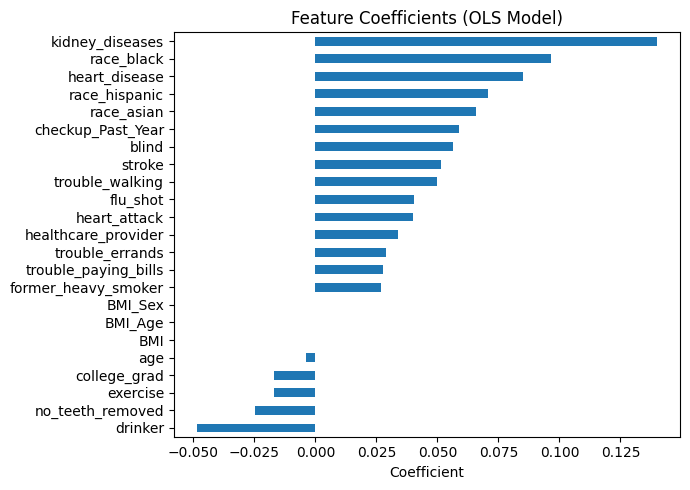

In [21]:
coef_df = model.params.sort_values()
coef_df.plot(kind='barh', figsize=(7,5))
plt.title("Feature Coefficients (OLS Model)")
plt.xlabel("Coefficient")
plt.tight_layout()
plt.show()

Residual Standard Error (RSE): 0.3324


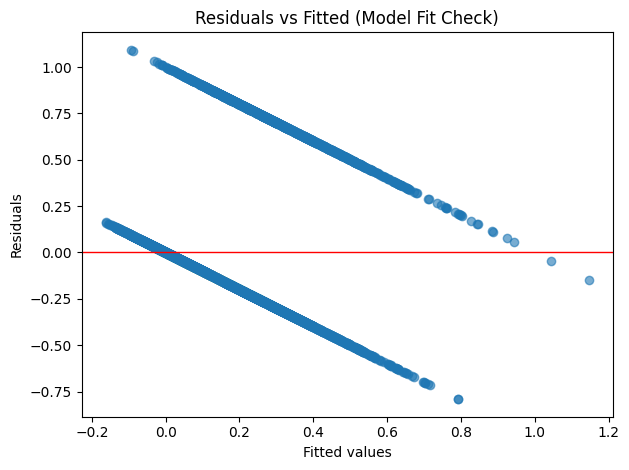

In [22]:
#residual plot: model fit check
residuals = model.resid
fitted = model.fittedvalues

# Calculate Residual Standard Error (RSE)
n = len(residuals)              
p = model.df_model + 1           
RSS = np.sum(residuals**2)       
RSE = np.sqrt(RSS / (n - p))     
print(f"Residual Standard Error (RSE): {RSE:.4f}")

plt.scatter(fitted, residuals, alpha=0.6)
plt.axhline(0, color='red', linewidth=1)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted (Model Fit Check)")
plt.tight_layout()
plt.show()

In [23]:

from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=12345)

std = StandardScaler()
X_tr = std.fit_transform(X_train.values)
X_te = std.transform(X_test.values)

**Implementing Regularization**

Ridge

In [24]:
from sklearn.linear_model import RidgeCV

n_alphas = 200
alphas = np.logspace(-3, 3, n_alphas)

ridge_model = RidgeCV(alphas=alphas, cv=5)

ridge_model.fit(X_tr, y_train)


RidgeCV(alphas=array([1.00000000e-03, 1.07189132e-03, 1.14895100e-03, 1.23155060e-03,
       1.32008840e-03, 1.41499130e-03, 1.51671689e-03, 1.62575567e-03,
       1.74263339e-03, 1.86791360e-03, 2.00220037e-03, 2.14614120e-03,
       2.30043012e-03, 2.46581108e-03, 2.64308149e-03, 2.83309610e-03,
       3.03677112e-03, 3.25508860e-03, 3.48910121e-03, 3.73993730e-03,
       4.00880633e-03, 4.29700470e-0...
       2.02550194e+02, 2.17111795e+02, 2.32720248e+02, 2.49450814e+02,
       2.67384162e+02, 2.86606762e+02, 3.07211300e+02, 3.29297126e+02,
       3.52970730e+02, 3.78346262e+02, 4.05546074e+02, 4.34701316e+02,
       4.65952567e+02, 4.99450512e+02, 5.35356668e+02, 5.73844165e+02,
       6.15098579e+02, 6.59318827e+02, 7.06718127e+02, 7.57525026e+02,
       8.11984499e+02, 8.70359136e+02, 9.32930403e+02, 1.00000000e+03]),
        cv=5)

In [25]:
print(ridge_model.score(X_tr, y_train))
print(mae(y_train, ridge_model.predict(X_tr)))
print(ridge_model.alpha_)

print(ridge_model.score(X_te, y_test))
print(mae(y_test, ridge_model.predict(X_te)))

0.1578587649356039
0.23062970271481306
3.6123426997094303
0.16958688344185124
0.23017075671807546


Lasso

In [26]:
from sklearn.linear_model import LassoCV

n_alphas = 200
alphas = np.logspace(-3, 3, n_alphas)

lasso_model = LassoCV(alphas=alphas, cv=5)

lasso_model.fit(X_tr, y_train)
print(lasso_model.score(X_tr, y_train))
print(mae(y_train, lasso_model.predict(X_tr)))
print(lasso_model.alpha_)

print(lasso_model.score(X_te, y_test))
print(mae(y_test, lasso_model.predict(X_te)))

0.15651488093568944
0.23228374190188128
0.001
0.1674006437429204
0.23192829057473263


In [27]:
list(zip(X.columns, lasso_model.coef_))

[('healthcare_provider', 0.01478658889188369),
 ('exercise', -0.01108740098125397),
 ('heart_attack', 0.007730318884608802),
 ('heart_disease', 0.018190707082132877),
 ('stroke', 0.01385699301384902),
 ('kidney_diseases', 0.03007804232632391),
 ('blind', 0.011823959077251879),
 ('trouble_walking', 0.020186404724758966),
 ('trouble_errands', 0.007834462377304856),
 ('flu_shot', 0.017590636933282038),
 ('trouble_paying_bills', 0.006283392592943734),
 ('age', -0.037973256529846046),
 ('BMI', -0.0021411803139710717),
 ('drinker', -0.02317327437277274),
 ('checkup_Past_Year', 0.02091697095055474),
 ('no_teeth_removed', -0.009183168593073159),
 ('former_heavy_smoker', 0.005422045980966234),
 ('race_asian', 0.009777176082200849),
 ('race_black', 0.026107305570559153),
 ('race_hispanic', 0.012469181534635724),
 ('college_grad', -0.009356159337942826),
 ('BMI_Age', 0.10120143432733124),
 ('BMI_Sex', 0.010078470352454322)]

ENET

In [28]:
from sklearn.linear_model import ElasticNetCV
alphas = 10 ** np.linspace(-3, 3, 200)
l1_ratios = np.linspace(.01, 1, 10)

enet_model = ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios, cv=5)

enet_model.fit(X_tr, y_train)
print(enet_model.score(X_tr, y_train))
print(enet_model.score(X_te, y_test))
print(enet_model.alpha_)
print(enet_model.l1_ratio_)

print(mae(y_train, enet_model.predict(X_tr)))

print(mae(y_test, enet_model.predict(X_te)))

0.15784448792014816
0.16948810811056758
0.001
0.01
0.2307291164544861
0.23028956139344367


since all 3 methods produce the same result, predictive ceiling is being set by the data, not by the model choice.


Ridge results:
  Alpha chosen: 3.2745491628777286
  Train R²: 0.158, MAE: 0.231
  Test  R²: 0.170, MAE: 0.230

Lasso results:
  Alpha chosen: 0.001
  Train R²: 0.157, MAE: 0.232
  Test  R²: 0.167, MAE: 0.232

ElasticNet results:
  Alpha chosen: 0.001
  Train R²: 0.158, MAE: 0.231
  Test  R²: 0.169, MAE: 0.230


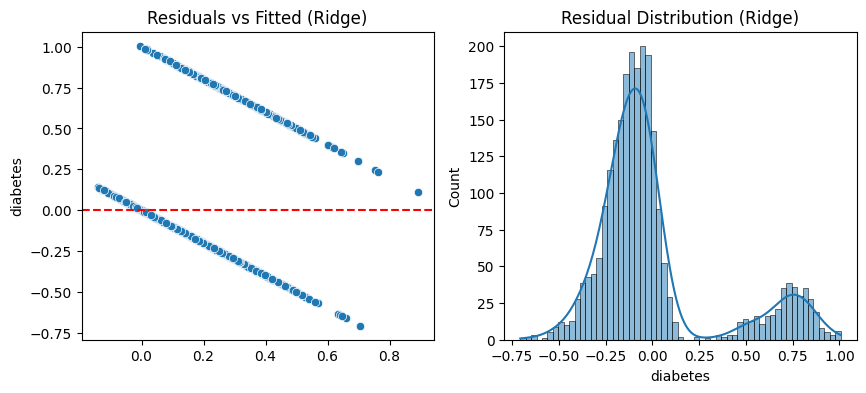

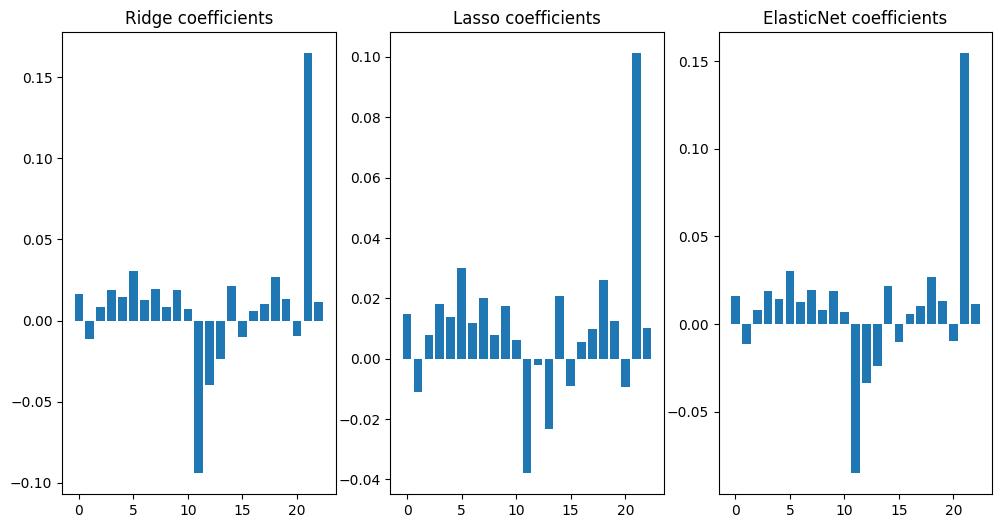

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import seaborn as sns

# --- 1. Define alpha grid ---
n_alphas = 100
alphas = np.logspace(-3, 3, n_alphas)

# --- 2. Fit Ridge, Lasso, Elastic Net ---
ridge = RidgeCV(alphas=alphas, cv=5).fit(X_tr, y_train)
lasso = LassoCV(alphas=alphas, cv=5, max_iter=10000).fit(X_tr, y_train)
enet = ElasticNetCV(alphas=alphas, l1_ratio=[.1, .5, .9], cv=5, max_iter=10000).fit(X_tr, y_train)

models = {
    "Ridge": ridge,
    "Lasso": lasso,
    "ElasticNet": enet
}

# --- 3. Evaluate each model ---
for name, model in models.items():
    y_pred_tr = model.predict(X_tr)
    y_pred_te = model.predict(X_te)
    print(f"\n{name} results:")
    print(f"  Alpha chosen: {getattr(model, 'alpha_', None)}")
    print(f"  Train R²: {r2_score(y_train, y_pred_tr):.3f}, MAE: {mean_absolute_error(y_train, y_pred_tr):.3f}")
    print(f"  Test  R²: {r2_score(y_test, y_pred_te):.3f}, MAE: {mean_absolute_error(y_test, y_pred_te):.3f}")

# --- 4. Residual plots for one model (e.g., Ridge) ---
y_pred = ridge.predict(X_te)
residuals = y_test - y_pred

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Fitted (Ridge)")

plt.subplot(1,2,2)
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution (Ridge)")
plt.show()

# --- 5. Coefficient inspection ---
coef_df = {
    "Ridge": ridge.coef_,
    "Lasso": lasso.coef_,
    "ElasticNet": enet.coef_
}
plt.figure(figsize=(12,6))
for i, (name, coefs) in enumerate(coef_df.items(), 1):
    plt.subplot(1,3,i)
    plt.bar(range(len(coefs)), coefs)
    plt.title(f"{name} coefficients")
plt.show()